In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import atus_tools
import john_list

Various claims to compare to
- men vs women leisure, age group (TEAGE)
- relative prevelance of different activities

#Distribution of Leisure Activities
Note that these are based on the 3rd tier of classification, giving granular category types.

In [9]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

In [10]:
for_pie = summary[atus_tools.activity_columns(summary, "12")]

In [11]:
col_list = atus_tools.cat_descriptions(for_pie, "12")
for i in range(len(col_list)):
    col_list[i] = col_list[i][:30]
for_pie.columns = col_list

In [52]:
for_pie.columns # the full list before it is cut down for visualization

Index(['Socializing and communicating ', 'Attending or hosting parties/r',
       'Attending meetings for persona', 'Attending/hosting social event',
       'Relaxing, thinking', 'Tobacco and drug use',
       'Television and movies (not rel', 'Television (religious)',
       'Listening to the radio', 'Listening to/playing music (no',
       'Playing games', 'Computer use for leisure (excl',
       'Arts and crafts as a hobby', 'Collecting as a hobby',
       'Hobbies, except arts & crafts ', 'Reading for personal interest',
       'Writing for personal interest', 'Relaxing and leisure, n.e.c.*',
       'Attending performing arts', 'Attending museums',
       'Attending movies/film', 'Attending gambling establishme',
       'Arts and entertainment, n.e.c.', 'Waiting assoc. w/socializing &',
       'Waiting assoc. w/attending/hos', 'Waiting associated with relaxi',
       'Waiting associated with arts &', 'Waiting associated with social',
       'Socializing, relaxing, and lei'],
      

In [49]:
avg_values = (for_pie.mean() / 60 * 7).order(ascending=True)
plot_values = avg_values[-8:]
other_val = pd.Series([avg_values[:-8].sum() / 60 * 7], index=["others"])
plot_values.append(other_val)

Attending movies/film              0.219458
Attending or hosting parties/r     0.605058
Computer use for leisure (excl     1.353067
Playing games                      1.368213
Relaxing, thinking                 2.190884
Reading for personal interest      2.514251
Socializing and communicating      4.897674
Television and movies (not rel    20.804070
others                             0.149037
dtype: float64

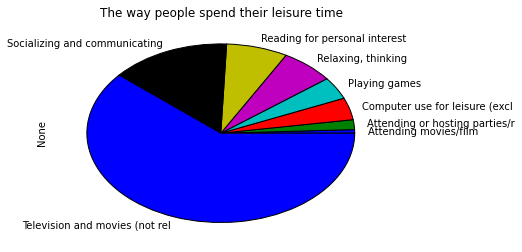

In [51]:
plot_values.plot(kind="pie")
plt.title("The way people spend their leisure time")
plt.show()

We find that TV takes up a surisingly large portion of leisure time. I believe that sports are not covered by this category, so it's not quite as bad as it sounds.

#Age and Gender Differences

In [80]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # get from file

In [81]:
def cut_by_x(dfp, col_name, Nmin, Nmax, act_code):
    '''Given a dataframe, return a dataframe giving mean of activity hours for the i_th subgroup of category'''
    df = dfp
    df_list = []
    for i in range(Nmin, Nmax):
        new_df = df[df[col_name] == i]  # pick out rows with values that bin into "i"
        new_df = new_df[atus_tools.activity_columns(df, act_code)].mean() / 60 * 7 # cut down included columns
        df_list.append(new_df)    
    use_cols = atus_tools.activity_columns(df, act_code)
    df_combined = pd.DataFrame(columns=use_cols)
    for i in range(Nmin, Nmax):
        df_combined.loc[i-Nmin] = df_list[i-Nmin]
    df_combined = atus_tools.merge_2nd_level(df_combined)
    print_cols  = atus_tools.cat_descriptions(df_combined, act_code)
    for i in range(len(print_cols)):
        print_cols[i] = print_cols[i][:20]
    df_combined.columns = print_cols
    return df_combined

def cut_by_sex(dfp, act_code):
    df = dfp
    df_ret = cut_by_x(df, "TESEX", 1, 3, act_code)
    df_ret.index = ["men", "women"]
    return df_ret

def cut_by_children(dfp, act_code):
    df = dfp
    df_ret = cut_by_x(df, "TRCHILDNUM", 0, 5, act_code)
    df_ret.index = [str(i)+" children" for i in range(5)]
    return df_ret

def cut_by_age(dfp, act_code):
    df = dfp
    df_ret = cut_by_x(df, "TEAGE", 0, 85, act_code)
    df_ret.index = [str(i)+" yrs" for i in range(85)]
    return df_ret


In [82]:
sex_leisure   = cut_by_sex(summary, "12")
age_leisure   = cut_by_age(summary, "12")
child_leisure = cut_by_children(summary, "12")

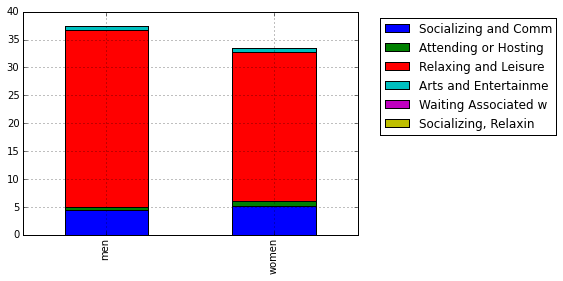

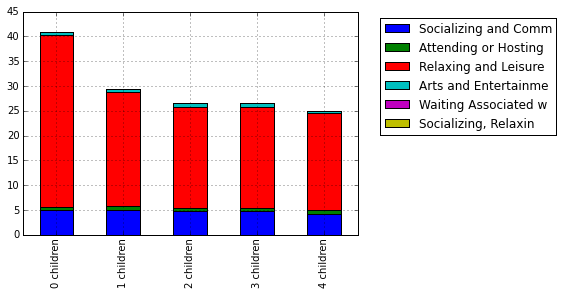

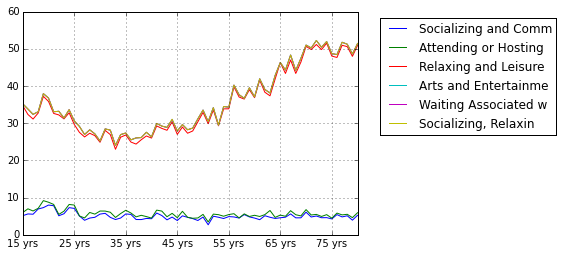

In [94]:
sex_leisure.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
child_leisure.plot(kind="bar", stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
age_leisure[15:81].plot(kind="line", stacked=True) # found 15 to 80 to be the only ones with data
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Men have more leisure time than women, but this also has a strong dependence on the number of children in the household, as well as apparently other life factors. In fact, there seems to be an obvious "float" value which changes in response to other other life factors - and this is the "relaxing and leisure" category. This is compressed when having children, and seems to be the only one compressed. It also varies through stages of life, reaching a minimum around age 30, and then growing to its highest levels in retirement. Perhaps the age difference isn't a distinct factor. It could just happen to be the case that 30-year-olds are the most likely to have young children. As such, they experience the greatest compression of relaxation time.